# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [3]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [4]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


### Import data

In [5]:
drive = "D"
date = "20240504"
mdl = "rfr"
mdl = "gbr"
mdl = "abr"

In [6]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [7]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"
#csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_mask_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_annual_density_near_met_si_fire.csv"

## Set output file locations

In [8]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [9]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [10]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(189, 297)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

In [11]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [12]:
df

,uid,site_clean,date,lon_gda94,lat_gda94,bio_l_kg1ha,bio_t_kg1ha,bio_b_kg1ha,bio_w_kg1ha,bio_br_kg1ha,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,70,nt001.2011,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-963139.00,963139.00,2033821.00,-266174.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,24,barkely01.2011,20111025,135.04,-18.00,0.00,0.00,0.00,0.00,0.00,...,-1995622.00,1995622.00,1967000.00,-635406.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,26,barkely03.2011,20111026,135.29,-18.02,0.00,0.00,0.00,0.00,0.00,...,-1703353.00,1703353.00,2254432.00,-530218.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,27,barkely04.2011,20111026,135.23,-17.98,0.00,0.00,0.00,0.00,0.00,...,-2256318.00,2256318.00,2646032.00,-303355.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,25,barkely02.2011,20111026,135.26,-18.06,0.00,0.00,0.00,0.00,0.00,...,-2041078.00,2041078.00,3188841.00,399323.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,158,site23.2023,20230916,132.54,-12.66,320.02,347.99,1359.66,4423.39,3354.31,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,155,site20.2023,20230916,131.56,-12.81,602.67,654.04,2204.47,11815.54,5206.21,...,-2002328.00,2002328.00,3735369.00,567737.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00
186,156,site21.2023,20230916,131.57,-12.82,1934.59,2097.90,5741.75,22983.80,12704.86,...,-1072797.00,1072797.00,5216990.00,1735106.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00
187,157,site22.2023,20230916,132.25,-12.77,568.16,616.63,2503.13,16614.99,5420.45,...,-1377778.00,1377778.00,4443054.00,1184880.00,1823000.00,2830628.00,1668000.00,3147962.00,5658073.00,8990129.00


## Main only

In [13]:
# #main only
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [12]:
#main major and h99 
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major", "h99"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [13]:
df2

,site_clean,target,fire_mean,fire_major,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,rh_tmax_mean,rh_tmin_mean,...,b1_ccw_dry_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b4_dbifm_dry_mean,b5_dbifm_dry_mean,b6_dbifm_dry_mean
0,nt001.2011,0.00,0.00,0.00,0.00,1.20,32.60,16.30,3311.10,3368.30,...,87.33,394.67,10.33,62.56,25.67,760.33,922.56,2633.89,2777.78,1743.22
1,barkely01.2011,0.00,0.00,0.00,0.30,1.20,37.00,23.60,3312.20,3353.40,...,1.00,613.33,4.11,2.11,92.33,1097.78,1644.89,2756.00,3130.33,1850.89
2,barkely03.2011,0.00,0.00,0.00,0.00,2.10,38.50,23.80,3312.20,3359.00,...,2.25,675.56,3.44,4.22,90.67,1225.89,1728.67,2938.67,3267.11,1857.33
3,barkely04.2011,0.00,0.00,0.00,0.10,2.00,38.60,23.90,3311.90,3358.10,...,9.44,457.78,4.44,3.67,90.11,858.00,1358.11,2717.56,2887.11,1580.67
4,barkely02.2011,0.00,0.00,0.00,0.00,2.00,38.60,23.90,3311.70,3357.80,...,13.22,470.67,8.89,0.22,89.78,930.33,1407.67,3073.11,2837.67,1587.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,site23.2023,9471.00,7.60,8.00,0.00,0.50,30.50,16.90,3348.80,3373.30,...,30.11,441.11,24.44,27.78,46.33,712.67,897.67,1833.33,2360.00,1845.44
185,site20.2023,19813.34,0.00,0.00,0.00,2.50,30.70,13.40,3353.90,3376.50,...,54.22,402.33,2.67,42.11,53.67,687.44,1031.78,2699.78,2409.33,1231.00
186,site21.2023,43331.12,0.00,0.00,0.00,2.50,30.70,13.40,3353.90,3376.50,...,81.89,254.44,2.56,56.00,39.78,466.44,578.22,2472.89,1741.44,777.22
187,site22.2023,25116.35,0.00,0.00,0.00,0.80,30.30,15.90,3351.20,3372.00,...,73.42,240.50,2.08,45.58,50.83,485.33,640.08,2308.25,1819.83,888.17


### Logical selection

## dp1_dbi_si_dry_mask_density_near_met_si_fire.csv

In [14]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
#  'jan', 
#  'feb', 
#  'mar', 
#  'april', 
#  'may', 
#  'june', 
#  'july', 
#  'aug', 
#  'sep', 
#  'oct', 
#  'nov', 
#  'dec', 
#   'jan_per', 
#  'feb_per', 
#  'mar_per', 
#  'april_per', 
#  'may_per', 
#  'june_per', 
#  'july_per', 
#  'aug_per',
#  'sep_per', 
#  'oct_per', 
#  'nov_per', 
#  'dec_per', 
 'burnt_enco', 
#  'burnt_cat', 
 'fire_sn_ord', 
#  'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
#  'tot_an_emsi_avg', 
#  'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
#  'emsi_dt', 
#  'tot_an_drsi_avg', 
#  'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
#  'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
#  'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
#  'drse_dt', 
#  'rain_d_mean', 
#  'et_ma_mean', 
#  'tmax_mean', 
#  'tmin_mean', 
#  'rh_tmax_mean', 
#  'rh_tmin_mean', 
#  'b1_wfp_dry_min', 
#  'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
#  'b1_wfp_dry_std', 
#  'b1_wfp_dry_med', 
#  'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
#  'b1_wfp_dry_p75', 
#  'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
#  'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
#  'b1_n17_dry_minor', 
#  'b1_hsd_min', 
#  'b1_hsd_max', 
 'b1_hsd_mean', 
#  'b1_hsd_std', 
#  'b1_hsd_med', 
#  'b1_hsd_p25', 
 'b1_hsd_p50', 
#  'b1_hsd_p75', 
#  'b1_hsd_p95', 
 'b1_hsd_p99', 
#  'b1_hmc_min', 
#  'b1_hmc_max', 
 'b1_hmc_mean', 
#  'b1_hmc_std', 
#  'b1_hmc_med', 
#  'b1_hmc_p25', 
 'b1_hmc_p50', 
#  'b1_hmc_p75', 
#  'b1_hmc_p95', 
 'b1_hmc_p99', 
#  'b1_hcv_min', 
#  'b1_hcv_max', 
 'b1_hcv_mean', 
#  'b1_hcv_std', 
#  'b1_hcv_med', 
#  'b1_hcv_p25', 
 'b1_hcv_p50', 
#  'b1_hcv_p75', 
#  'b1_hcv_p95', 
 'b1_hcv_p99', 
#  'hcv_dt', 
#  'b1_h99_min', 
#  'b1_h99_max', 
 'b1_h99_mean', 
#  'b1_h99_std', 
#  'b1_h99_med', 
#  'b1_h99_p25',
 'b1_h99_p50', 
#  'b1_h99_p75', 
#  'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
#  'b1_fdc_dry_minor', 
#  'b1_ccw_dry_min', 
#  'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
#  'b1_ccw_dry_std', 
#  'b1_ccw_dry_med', 
#  'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
#  'b1_ccw_dry_p75', 
#  'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
#  'b1_dbifm_dry_min', 
#  'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
#  'b1_dp1fm_dry_min', 
#  'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
#  'b1_dp1fm_dry_std',
#  'b1_dp1fm_dry_med', 
#  'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
#  'b1_dp1fm_dry_p75',
#  'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
#  'b2_dp1fm_dry_min', 
#  'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
#  'b2_dp1fm_dry_std', 
#  'b2_dp1fm_dry_med', 
#  'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
#  'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
#  'b2_dp1fm_dry_p99', 
#  'b3_dp1fm_dry_min', 
#  'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
#  'b3_dp1fm_dry_std',
#  'b3_dp1fm_dry_med',
#  'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
#  'b3_dp1fm_dry_p75', 
#  'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
#  'b1_dbifm_dry_std',
#  'b1_dbifm_dry_med',
#  'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
#  'b1_dbifm_dry_p75', 
#  'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
#  'b2_dbifm_dry_min', 
#  'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
#  'b2_dbifm_dry_std', 
#  'b2_dbifm_dry_med', 
#  'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
#  'b2_dbifm_dry_p75', 
#  'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
#  'b3_dbifm_dry_min', 
#  'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
#  'b3_dbifm_dry_std',
#  'b3_dbifm_dry_med', 
#  'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
#  'b3_dbifm_dry_p75', 
#  'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
#  'b4_dbifm_dry_min', 
#  'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
#  'b4_dbifm_dry_std', 
#  'b4_dbifm_dry_med', 
#  'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
#  'b4_dbifm_dry_p75', 
#  'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
#  'b5_dbifm_dry_min', 
#  'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
#  'b5_dbifm_dry_std', 
#  'b5_dbifm_dry_med', 
#  'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
#  'b5_dbifm_dry_p75',
#  'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
#  'b6_dbifm_dry_min', 
#  'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
#  'b6_dbifm_dry_std',
#  'b6_dbifm_dry_med', 
#  'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
#  'b6_dbifm_dry_p75', 
#  'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',
#  'dbifmdry_psB1a', 
#  'dbifmdry_psB2a', 
#  'dbifmdry_psB3a', 
#  'dbifmdry_psB4a', 
#  'dbifmdry_psB5a', 
#  'dbifmdry_psB6a', 
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

d_type = "mm_si_f"

## Main and Major Only

In [15]:
#main and major only
var_ = "main_major_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]
d_type = "mean_major"

In [16]:
#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean','rh_tmin_mean'], axis=1)
df2.columns
d_type = "mean_major_met_rem"

In [17]:
df2.shape

(189, 22)

## Main and veg indicies

In [18]:
var_ = "main_veg_indicies"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'major', 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 #'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 #'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

del df2['fire_mean']
del df2['rh_tmin_mean']

#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
print(list(df2.columns))
d_type = "mm_met_rem"

['site_clean', 'target', 'fire_major', 'b1_wfp_dry_mean', 'b1_wdc_dry_major', 'b1_n17_dry_major', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_fdc_dry_major', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


## Main, veg indicies and fire

In [14]:
var_ = "main_veg_indicies_fire"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
       #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
       ]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
print(list(df2.columns))
d_type = "mmf_met_rem"

['site_clean', 'target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


## Remove all target == 0 values

In [15]:
df2 = df2[df2['target']>0.0]
df2.shape

(132, 35)

## Remove site values which seem like outliers

In [16]:
#Dry Fire

#WFP
'''ant03.2012
site12.2023 # lat long error - should be correted
ntagfu0038.2012 # not too bad

'''

# Drop rows where sites seem to be outliers
df3 = df2[df2['site_clean'] != 'ant03.2012']
df4 = df3[df3['site_clean'] != 'site12.2023']
df2 = df4[df4['site_clean'] != 'ntagfu0038.2012']
df2


"""#b1 dbifm
nc02.2013
ntamgd0001.2014
nc02.2013

#b2 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b3 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b4 dbifm
Noisy

#b5 dbifm
reasonable

#b2 dp1
looks pritty reasonable

#b3 dp1
Noisy <1200

#b6 dbifm
wh07.2012
reasonable

#h99

ntastu0003.2016
nttdab0001.2014
ntagfu0035.2012
ntagfu0034.2012

#hcv
site10.2023
site16.2023
site23.2023
girra02.2012
vrd37.2012
ntagfu0034.2012
ntagfu0035.2012

#hmc
nttdab0001.2014
ntastu0003.2016

#n17
ntagfu0003.2012
wh02.2012
wh07.2012 >10
#many are class 1

#wfp looks pritty reasonable

#et ma mean
noisy
"""

'#b1 dbifm\nnc02.2013\nntamgd0001.2014\nnc02.2013\n\n#b2 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b3 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b4 dbifm\nNoisy\n\n#b5 dbifm\nreasonable\n\n#b2 dp1\nlooks pritty reasonable\n\n#b3 dp1\nNoisy <1200\n\n#b6 dbifm\nwh07.2012\nreasonable\n\n#h99\n\nntastu0003.2016\nnttdab0001.2014\nntagfu0035.2012\nntagfu0034.2012\n\n#hcv\nsite10.2023\nsite16.2023\nsite23.2023\ngirra02.2012\nvrd37.2012\nntagfu0034.2012\nntagfu0035.2012\n\n#hmc\nnttdab0001.2014\nntastu0003.2016\n\n#n17\nntagfu0003.2012\nwh02.2012\nwh07.2012 >10\n#many are class 1\n\n#wfp looks pritty reasonable\n\n#et ma mean\nnoisy\n'

## Drop AGB numbers which are low

In [17]:
df2 = df2[df2['target']>0.0]
#df2 = df2[df2['target']>1000.0]
df2.shape

(129, 35)

## Drop AGB numbers which are high

In [18]:
# drop the 7 tern sites that apear to be outliers
df2 =df2[df2['target'] <= 40000]
df2.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format('target')))
#df2 =df2[df2['target'] > 40000]
#df2.value_counts(['site_clean', value_x, value_y])

In [19]:
df2

,site_clean,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rh_tmin_mean,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,barkely07.2011,1894.20,0.00,0.20,0.00,0.00,3339.70,3.44,100.87,101.66,...,-1615977.00,1615977.00,2582020.00,-100570.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,ntagfu0001.2012,1536.15,0.00,0.00,0.00,0.00,3319.60,3.90,101.86,102.64,...,-1510107.00,1510107.00,-175857.00,-1953125.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
9,ntagfu0002.2012,1164.24,10.00,2.57,0.05,0.00,3363.80,8.33,101.43,102.40,...,-1876268.00,1876268.00,269231.00,-1603774.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
10,ntagfu0003.2012,4736.01,0.00,0.20,0.00,0.00,3364.00,7.75,102.83,104.48,...,-1777222.00,1777222.00,310559.00,-1019362.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,ntagfu0005.2012,1549.09,0.00,0.73,0.00,0.00,3350.30,33.58,103.20,105.79,...,-1300000.00,1300000.00,1552760.00,-371783.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,site18.2023,22731.51,2.25,20.09,8.32,2.81,3372.00,45.58,104.70,109.83,...,-1435445.00,1435445.00,2511305.00,372407.00,1541000.00,2298430.00,1362000.00,2623267.00,4885222.00,7059421.00
184,site23.2023,9471.00,7.60,20.09,8.32,2.81,3373.30,17.22,103.50,104.50,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,site20.2023,19813.34,0.00,20.09,8.32,2.81,3376.50,34.22,103.35,107.11,...,-2002328.00,2002328.00,3735369.00,567737.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00
187,site22.2023,25116.35,0.00,16.53,5.12,1.06,3372.00,51.00,104.82,111.21,...,-1377778.00,1377778.00,4443054.00,1184880.00,1823000.00,2830628.00,1668000.00,3147962.00,5658073.00,8990129.00


### Remove all outliers 3 std deviations above the mean

In [20]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        #print(mask)
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
        print(filtered_df.shape)
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  fire_pois1_5
mean:  2.3287086614173225
std_dev:  3.5145674960497577
threshold:  10.543702488149274
(126, 1)
____________________
column:  fire_pois1_10
mean:  0.7183779527559055
std_dev:  1.5072970179969318
threshold:  4.521891053990796
(126, 2)
____________________
column:  rh_tmin_mean
mean:  3362.4795275590554
std_dev:  15.90642072906248
threshold:  47.71926218718744
(126, 3)
____________________
column:  b1_wfp_dry_mean
mean:  26.29322115985502
std_dev:  19.475333735693553
threshold:  58.42600120708066
(126, 4)
____________________
column:  b1_hsd_mean
mean:  102.9583168647212
std_dev:  1.2689711971800839
threshold:  3.8069135915402517
(126, 5)
____________________
column:  b1_hmc_mean
mean:  105.63882626207035
std_dev:  2.8257860888526767
threshold:  8.47735826655803
(126, 6)
____________________
column:  b1_hcv_mean
mean:  153.37892397456343
std_dev:  9.688482431696459
threshold:  29.065447295089378
(126, 7)
____________________
column:  b1_h99_mean


In [21]:
ft_orig

,site_clean,target,fire_mean,fire_pois1_2
7,barkely07.2011,1894.20,0.00,0.20
8,ntagfu0001.2012,1536.15,0.00,0.00
9,ntagfu0002.2012,1164.24,10.00,2.57
10,ntagfu0003.2012,4736.01,0.00,0.20
12,ntagfu0005.2012,1549.09,0.00,0.73
...,...,...,...,...
183,site18.2023,22731.51,2.25,20.09
184,site23.2023,9471.00,7.60,20.09
185,site20.2023,19813.34,0.00,20.09
187,site22.2023,25116.35,0.00,16.53


In [22]:
filtered_df

,fire_pois1_5,fire_pois1_10,rh_tmin_mean,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,b1_h99_mean,b1_ccw_dry_mean,b1_dbifm_dry_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,0.00,0.00,3339.70,3.44,100.87,101.66,146.92,104.14,6.89,616.44,...,-1615977.00,1615977.00,2582020.00,-100570.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,0.00,0.00,3319.60,3.90,101.86,102.64,166.36,107.86,6.33,465.33,...,-1510107.00,1510107.00,-175857.00,-1953125.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
9,0.05,0.00,3363.80,8.33,101.43,102.40,153.55,105.97,1.00,449.42,...,-1876268.00,1876268.00,269231.00,-1603774.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
10,0.00,0.00,3364.00,7.75,102.83,104.48,161.30,109.67,14.08,384.42,...,-1777222.00,1777222.00,310559.00,-1019362.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,0.00,0.00,3350.30,33.58,103.20,105.79,154.57,111.97,53.50,410.83,...,-1300000.00,1300000.00,1552760.00,-371783.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.82,0.03,3371.20,59.33,104.22,109.97,145.09,117.05,81.00,273.33,...,-902184.00,902184.00,3841717.00,922882.00,1681000.00,2738959.00,1586000.00,3076028.00,5801024.00,9398624.00
183,8.32,2.81,3372.00,45.58,104.70,109.83,151.26,117.52,67.92,328.00,...,-1435445.00,1435445.00,2511305.00,372407.00,1541000.00,2298430.00,1362000.00,2623267.00,4885222.00,7059421.00
184,8.32,2.81,3373.30,17.22,103.50,104.50,179.02,112.07,30.11,441.11,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,8.32,2.81,3376.50,34.22,103.35,107.11,147.69,112.71,54.22,402.33,...,-2002328.00,2002328.00,3735369.00,567737.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00


In [23]:
out_df

,site_clean,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rh_tmin_mean,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,barkely07.2011,1894.20,0.00,0.20,0.00,0.00,3339.70,3.44,100.87,101.66,...,-1615977.00,1615977.00,2582020.00,-100570.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,ntagfu0001.2012,1536.15,0.00,0.00,0.00,0.00,3319.60,3.90,101.86,102.64,...,-1510107.00,1510107.00,-175857.00,-1953125.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
9,ntagfu0002.2012,1164.24,10.00,2.57,0.05,0.00,3363.80,8.33,101.43,102.40,...,-1876268.00,1876268.00,269231.00,-1603774.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
10,ntagfu0003.2012,4736.01,0.00,0.20,0.00,0.00,3364.00,7.75,102.83,104.48,...,-1777222.00,1777222.00,310559.00,-1019362.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,ntagfu0005.2012,1549.09,0.00,0.73,0.00,0.00,3350.30,33.58,103.20,105.79,...,-1300000.00,1300000.00,1552760.00,-371783.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,site18.2023,22731.51,2.25,20.09,8.32,2.81,3372.00,45.58,104.70,109.83,...,-1435445.00,1435445.00,2511305.00,372407.00,1541000.00,2298430.00,1362000.00,2623267.00,4885222.00,7059421.00
184,site23.2023,9471.00,7.60,20.09,8.32,2.81,3373.30,17.22,103.50,104.50,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,site20.2023,19813.34,0.00,20.09,8.32,2.81,3376.50,34.22,103.35,107.11,...,-2002328.00,2002328.00,3735369.00,567737.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00
187,site22.2023,25116.35,0.00,16.53,5.12,1.06,3372.00,51.00,104.82,111.21,...,-1377778.00,1377778.00,4443054.00,1184880.00,1823000.00,2830628.00,1668000.00,3147962.00,5658073.00,8990129.00


In [24]:
# Check for null values
null_values = out_df.isnull().sum()

In [25]:
null_values

site_clean           0
target               0
fire_mean            1
fire_pois1_2         1
fire_pois1_5         2
fire_pois1_10        5
rh_tmin_mean         3
b1_wfp_dry_mean      3
b1_hsd_mean          2
b1_hmc_mean          2
b1_hcv_mean          3
b1_h99_mean          2
b1_ccw_dry_mean      2
b1_dbifm_dry_mean    3
b1_dp1fm_dry_mean    2
b2_dp1fm_dry_mean    3
b3_dp1fm_dry_mean    2
b2_dbifm_dry_mean    3
b3_dbifm_dry_mean    3
b4_dbifm_dry_mean    2
b5_dbifm_dry_mean    2
b6_dbifm_dry_mean    2
dbifmdry_GSAVI       2
dbifmdry_GNDVI       2
dbifmdry_CVI         2
dbifmdry_NDGI        5
dbifmdry_RI          5
dbifmdry_NBR         2
dbifmdry_NDII        2
dbifmdry_GDVI        2
dbifmdry_MSAVI       2
dbifmdry_DVI         2
dbifmdry_SAVI        2
dbifmdry_NDVI        2
dbifmdry_MSR         3
dtype: int64

In [26]:
out_df.dropna(inplace=True)

In [27]:
df2 = out_df
df2.shape

(117, 35)

In [28]:
#df2 = filtered_df

In [29]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [30]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [31]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5',
       'fire_pois1_10', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean',
       'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean',
       'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean',
       'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean',
       'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI',
       'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI',
       'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI',
       'dbifmdry_MSR'],
      dtype='object')


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 7 to 187
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_clean         117 non-null    object 
 1   target             117 non-null    float64
 2   fire_mean          117 non-null    float64
 3   fire_pois1_2       117 non-null    float64
 4   fire_pois1_5       117 non-null    float64
 5   fire_pois1_10      117 non-null    float64
 6   rh_tmin_mean       117 non-null    float64
 7   b1_wfp_dry_mean    117 non-null    float64
 8   b1_hsd_mean        117 non-null    float64
 9   b1_hmc_mean        117 non-null    float64
 10  b1_hcv_mean        117 non-null    float64
 11  b1_h99_mean        117 non-null    float64
 12  b1_ccw_dry_mean    117 non-null    float64
 13  b1_dbifm_dry_mean  117 non-null    float64
 14  b1_dp1fm_dry_mean  117 non-null    float64
 15  b2_dp1fm_dry_mean  117 non-null    float64
 16  b3_dp1fm_dry_mean  117 non

In [33]:
df2.columns

Index(['site_clean', 'target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5',
       'fire_pois1_10', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean',
       'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean',
       'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean',
       'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean',
       'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI',
       'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI',
       'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI',
       'dbifmdry_MSR'],
      dtype='object')

### Set variables to plot

In [34]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [35]:
value_y

'b1_wfp_mean'

In [36]:
df2.shape

(117, 35)

In [37]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [38]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [39]:
df2 = df2[df2['target']>0.0]
df2.shape

(117, 35)

In [40]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [41]:
print(column_list[3:])
print(column_list[1:2])

['fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']
['target']


## Choose which data set to run the models from

In [42]:
df_ml = df2

In [43]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [44]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [45]:
print(list(df_ml))

['target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [46]:
df_ml.shape

(117, 34)

In [47]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 7 to 187
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             117 non-null    float64
 1   fire_mean          117 non-null    float64
 2   fire_pois1_2       117 non-null    float64
 3   fire_pois1_5       117 non-null    float64
 4   fire_pois1_10      117 non-null    float64
 5   rh_tmin_mean       117 non-null    float64
 6   b1_wfp_dry_mean    117 non-null    float64
 7   b1_hsd_mean        117 non-null    float64
 8   b1_hmc_mean        117 non-null    float64
 9   b1_hcv_mean        117 non-null    float64
 10  b1_h99_mean        117 non-null    float64
 11  b1_ccw_dry_mean    117 non-null    float64
 12  b1_dbifm_dry_mean  117 non-null    float64
 13  b1_dp1fm_dry_mean  117 non-null    float64
 14  b2_dp1fm_dry_mean  117 non-null    float64
 15  b3_dp1fm_dry_mean  117 non-null    float64
 16  b2_dbifm_dry_mean  117 non

In [48]:
df_ml.head(5)

,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rh_tmin_mean,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,1894.20,0.00,0.20,0.00,0.00,3339.70,3.44,100.87,101.66,146.92,...,-1615977.00,1615977.00,2582020.00,-100570.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
8,1536.15,0.00,0.00,0.00,0.00,3319.60,3.90,101.86,102.64,166.36,...,-1510107.00,1510107.00,-175857.00,-1953125.00,934000.00,1116644.00,680000.00,1339286.00,2599388.00,3047909.00
9,1164.24,10.00,2.57,0.05,0.00,3363.80,8.33,101.43,102.40,153.55,...,-1876268.00,1876268.00,269231.00,-1603774.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
10,4736.01,0.00,0.20,0.00,0.00,3364.00,7.75,102.83,104.48,161.30,...,-1777222.00,1777222.00,310559.00,-1019362.00,920000.00,1050977.00,636000.00,1268955.00,2525814.00,2945566.00
12,1549.09,0.00,0.73,0.00,0.00,3350.30,33.58,103.20,105.79,154.57,...,-1300000.00,1300000.00,1552760.00,-371783.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00


## Reduce level of 0 values

In [49]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
#no0_df = df_ml[df_ml['target']>=10.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [50]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(117, 34)

In [51]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 7 to 187
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             117 non-null    float64
 1   fire_mean          117 non-null    float64
 2   fire_pois1_2       117 non-null    float64
 3   fire_pois1_5       117 non-null    float64
 4   fire_pois1_10      117 non-null    float64
 5   rh_tmin_mean       117 non-null    float64
 6   b1_wfp_dry_mean    117 non-null    float64
 7   b1_hsd_mean        117 non-null    float64
 8   b1_hmc_mean        117 non-null    float64
 9   b1_hcv_mean        117 non-null    float64
 10  b1_h99_mean        117 non-null    float64
 11  b1_ccw_dry_mean    117 non-null    float64
 12  b1_dbifm_dry_mean  117 non-null    float64
 13  b1_dp1fm_dry_mean  117 non-null    float64
 14  b2_dp1fm_dry_mean  117 non-null    float64
 15  b3_dp1fm_dry_mean  117 non-null    float64
 16  b2_dbifm_dry_mean  117 non

In [52]:
test = df_ml[df_ml['target']>40000.0]

In [53]:
test.shape

(0, 34)

In [54]:
df_ml.dropna(inplace=True)

In [55]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 7 to 187
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             117 non-null    float64
 1   fire_mean          117 non-null    float64
 2   fire_pois1_2       117 non-null    float64
 3   fire_pois1_5       117 non-null    float64
 4   fire_pois1_10      117 non-null    float64
 5   rh_tmin_mean       117 non-null    float64
 6   b1_wfp_dry_mean    117 non-null    float64
 7   b1_hsd_mean        117 non-null    float64
 8   b1_hmc_mean        117 non-null    float64
 9   b1_hcv_mean        117 non-null    float64
 10  b1_h99_mean        117 non-null    float64
 11  b1_ccw_dry_mean    117 non-null    float64
 12  b1_dbifm_dry_mean  117 non-null    float64
 13  b1_dp1fm_dry_mean  117 non-null    float64
 14  b2_dp1fm_dry_mean  117 non-null    float64
 15  b3_dp1fm_dry_mean  117 non-null    float64
 16  b2_dbifm_dry_mean  117 non

# Scatter plots with error

fire_mean
fire_mean
Regression
slope:  2.0735367764343813e-05
intersept:  1.8521848694441767
r2:  0.05364895457710557
P_value:  0.5656392145980174
std error:  3.598948749091868e-05


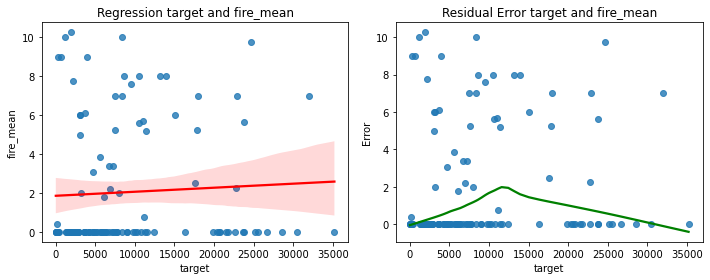

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
fire_pois1_2
fire_pois1_2
Regression
slope:  0.0002794209383107834
intersept:  5.2990831413269355
r2:  0.32369317220571153
P_value:  0.0003708143578744415
std error:  7.61626485361744e-05


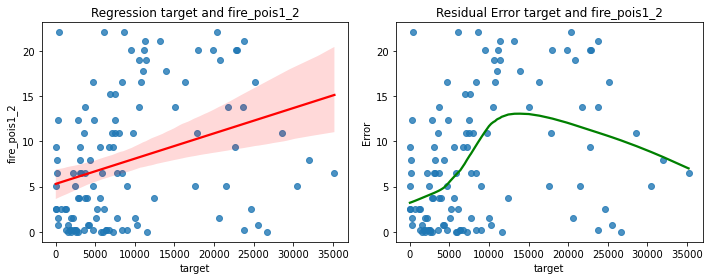

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
fire_pois1_5
fire_pois1_5
Regression
slope:  0.00011367312366325208
intersept:  1.0682516163030407
r2:  0.3038774505089694
P_value:  0.0008660433238068546
std error:  3.3233159994775626e-05


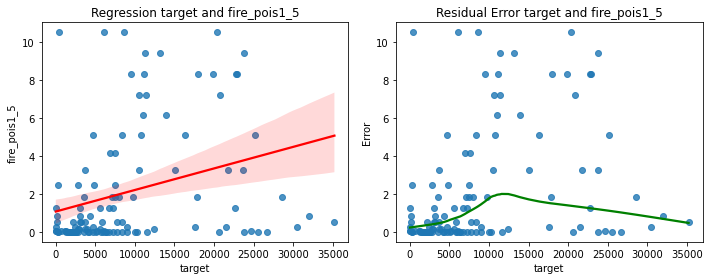

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
fire_pois1_10
fire_pois1_10
Regression
slope:  3.5470715708367535e-05
intersept:  0.24743563477668867
r2:  0.25465070034020876
P_value:  0.005593139763716086
std error:  1.2560805679891267e-05


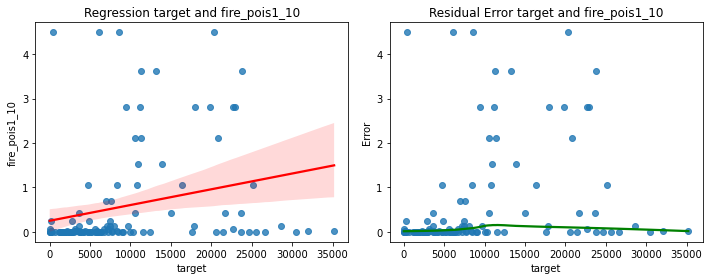

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
rh_tmin_mean
rh_tmin_mean
Regression
slope:  0.0006613113303817112
intersept:  3356.1874706877766
r2:  0.3457931069551206
P_value:  0.00013417784380841653
std error:  0.00016733524322691022


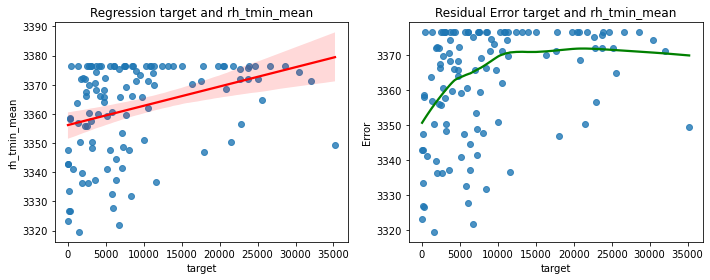

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.0016847208451119574
intersept:  10.340205842141604
r2:  0.7500841732023303
P_value:  2.1964793166360296e-22
std error:  0.00013851454382765994


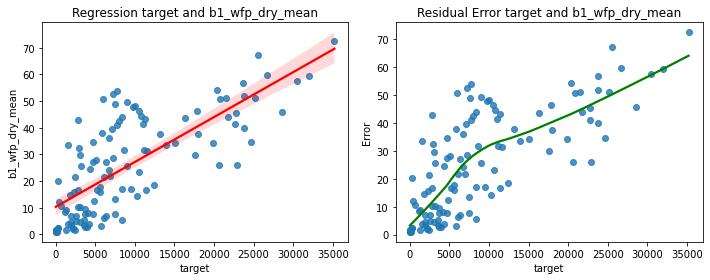

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_hsd_mean
b1_hsd_mean
Regression
slope:  0.00010681008980702883
intersept:  101.9920451717228
r2:  0.6938306684464426
P_value:  4.2491567745755275e-18
std error:  1.0337742412497015e-05


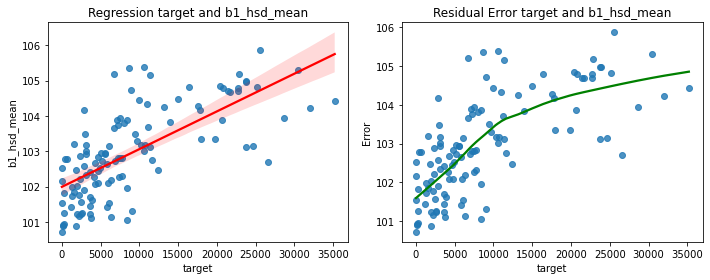

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00025077398547571994
intersept:  103.3153442865853
r2:  0.7282882836719302
P_value:  1.3467218016215178e-20
std error:  2.200353783685905e-05


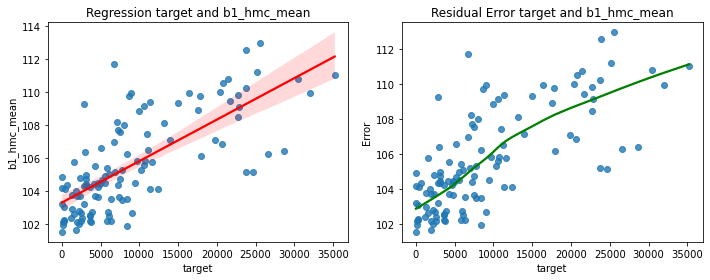

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_hcv_mean
b1_hcv_mean
Regression
slope:  -7.57091865306715e-05
intersept:  154.72341500753595
r2:  -0.06828569223715147
P_value:  0.464445185811014
std error:  0.00010314662722211545


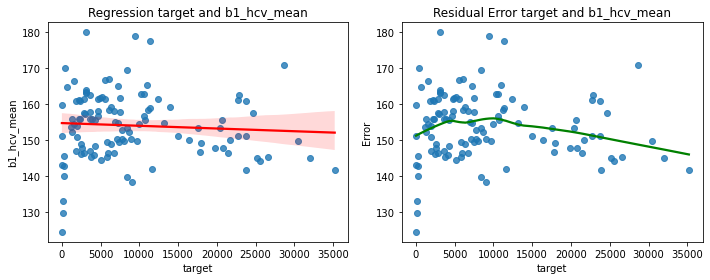

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_h99_mean
b1_h99_mean
Regression
slope:  0.0003843181655262323
intersept:  107.87771902741764
r2:  0.6977488001620262
P_value:  2.3014560183017474e-18
std error:  3.679286670289045e-05


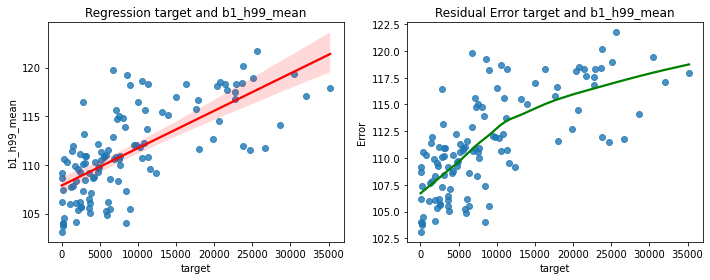

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.0022995324036010306
intersept:  18.34803212283865
r2:  0.7300143623191278
P_value:  9.864300326690536e-21
std error:  0.0002007494639362988


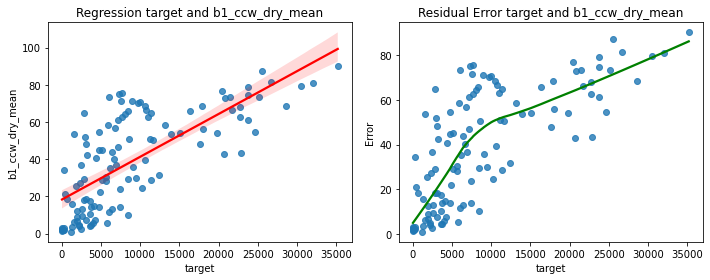

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.009927931143468724
intersept:  481.167286392562
r2:  -0.6467249067316357
P_value:  3.3660168036840025e-15
std error:  0.0010918356897411457


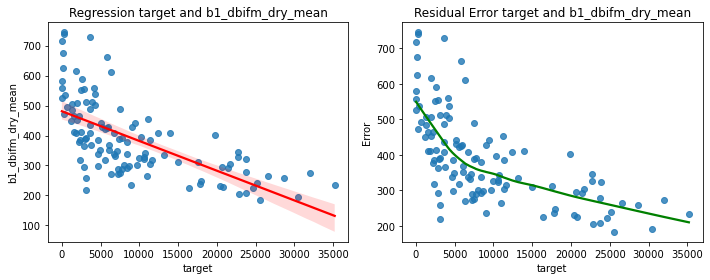

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.0003571577461040036
intersept:  14.054363972634373
r2:  -0.32518741205276447
P_value:  0.0003470099325745768
std error:  9.685179324716145e-05


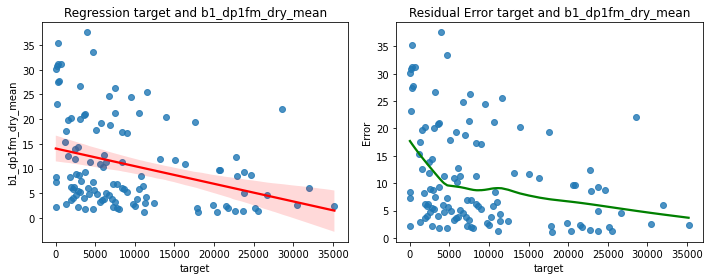

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.001449317666427833
intersept:  15.640210654775082
r2:  0.7520977864616659
P_value:  1.4699235990496632e-22
std error:  0.00011842945431455986


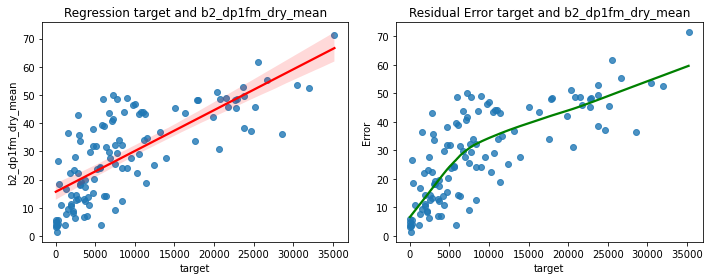

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0010946453097452063
intersept:  68.84324014205075
r2:  -0.6202019199515039
P_value:  8.84855704800259e-14
std error:  0.00012910776045315335


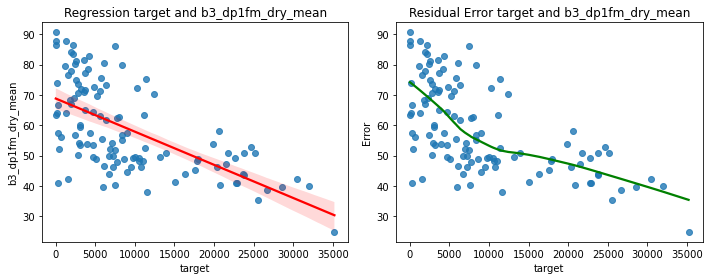

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.014853528632303721
intersept:  793.8721550757718
r2:  -0.6526591003968931
P_value:  1.5491611304337549e-15
std error:  0.0016079180912348153


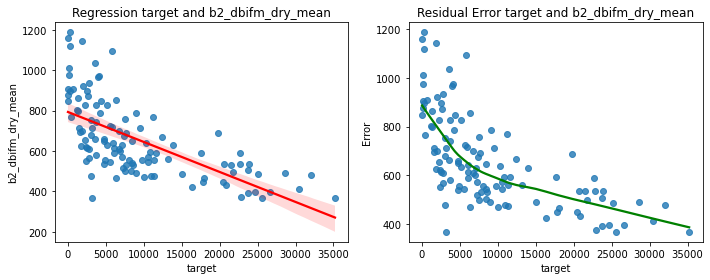

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.02424958497403797
intersept:  1139.9357615822937
r2:  -0.664658402218903
P_value:  3.056315845880994e-16
std error:  0.002541927554943377


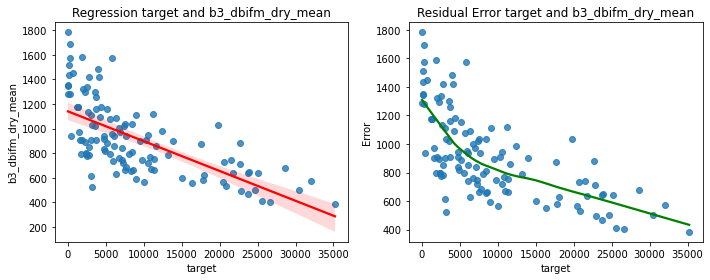

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  0.0005034635735723729
intersept:  2060.764940910469
r2:  0.013900829143481539
P_value:  0.8817483268906332
std error:  0.003377042019249165


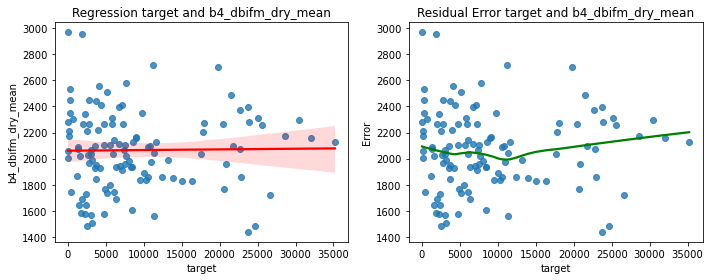

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.039610379045876956
intersept:  2722.822686187341
r2:  -0.6790451832745192
P_value:  3.945688199365761e-17
std error:  0.003993140081002647


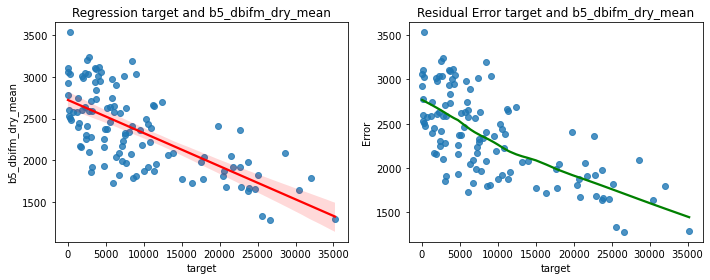

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.03851090938185847
intersept:  1846.7355623969675
r2:  -0.6883622216732934
P_value:  9.839074452093041e-18
std error:  0.00378421400798263


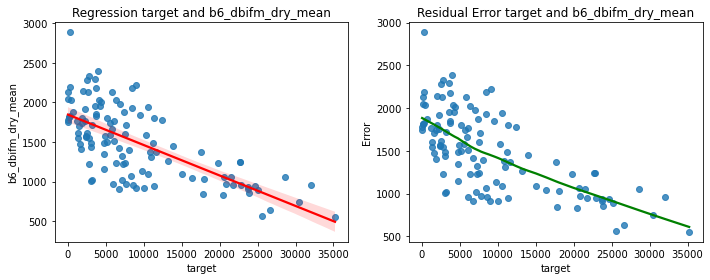

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  34.87391884414338
intersept:  2408812.653486653
r2:  0.6021426551835042
P_value:  6.90699107587738e-13
std error:  4.31188054369626


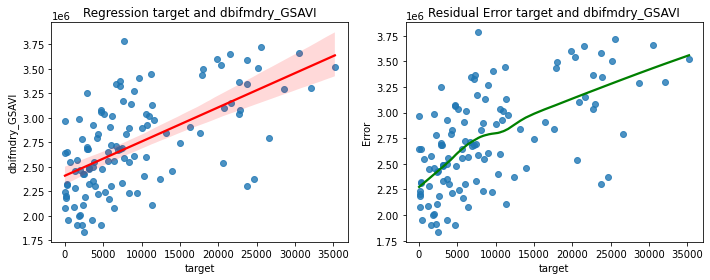

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  82.5322974643068
intersept:  4455844.315231978
r2:  0.7524354967528819
P_value:  1.3736513797076312e-22
std error:  6.737068247245829


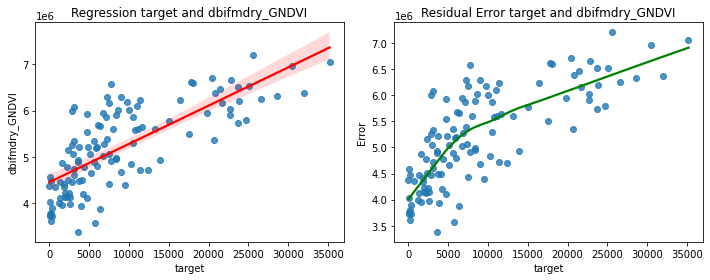

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  851.979429857202
intersept:  37818768.06924564
r2:  0.6792659967155626
P_value:  3.820182391268007e-17
std error:  85.83661126636466


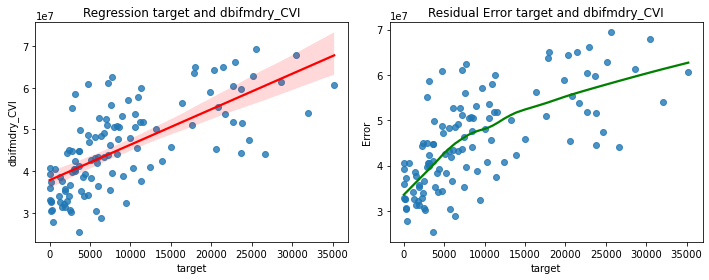

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_NDGI
dbifmdry_NDGI
Regression
slope:  25.980825187725394
intersept:  -1814096.8233209655
r2:  0.5019451332189595
P_value:  8.140129266047902e-09
std error:  4.174585890579892


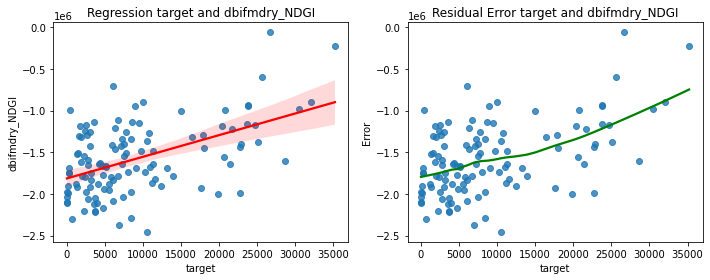

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -25.980825187725394
intersept:  1814096.8233209655
r2:  -0.5019451332189595
P_value:  8.140129266047902e-09
std error:  4.174585890579892


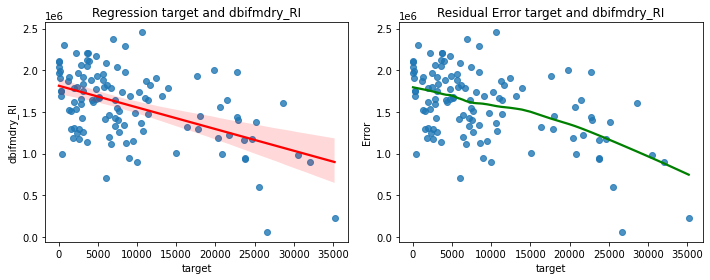

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  137.5500457872292
intersept:  486809.56031661923
r2:  0.682348191105715
P_value:  2.4257358806156613e-17
std error:  13.7416658473867


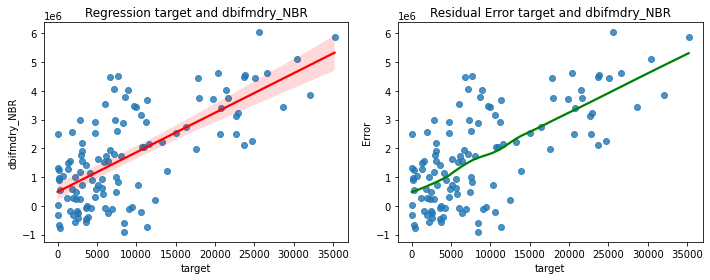

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_NDII
dbifmdry_NDII
Regression
slope:  91.95829797713041
intersept:  -1445512.4254486891
r2:  0.6687588021436538
P_value:  1.7251748262333594e-16
std error:  9.533260294113255


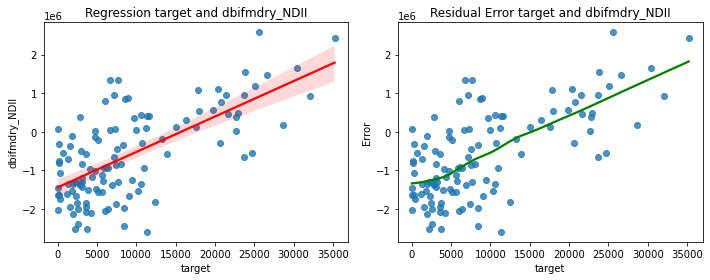

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  15.35602886206578
intersept:  1266955.953127122
r2:  0.4640233599777076
P_value:  1.3689331851307572e-07
std error:  2.733613365411875


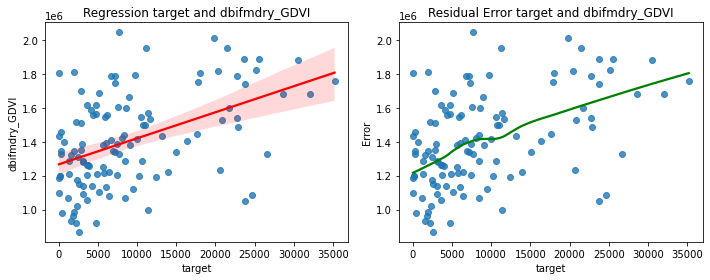

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  48.590823754046696
intersept:  1446003.2780895627
r2:  0.7048258073160913
P_value:  7.412924052968667e-19
std error:  4.560397947993688


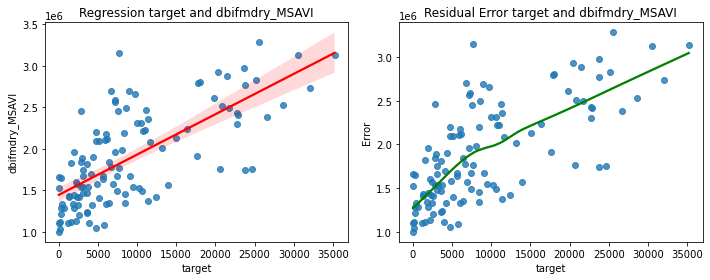

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  24.753864934334
intersept:  920863.772619958
r2:  0.6443982924764715
P_value:  4.541880001727323e-15
std error:  2.739208831647595


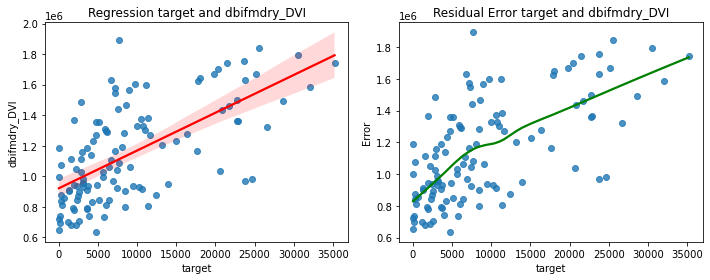

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  53.040146036566
intersept:  1678993.6934147875
r2:  0.7181818938921889
P_value:  7.955740565005856e-20
std error:  4.7922597995771135


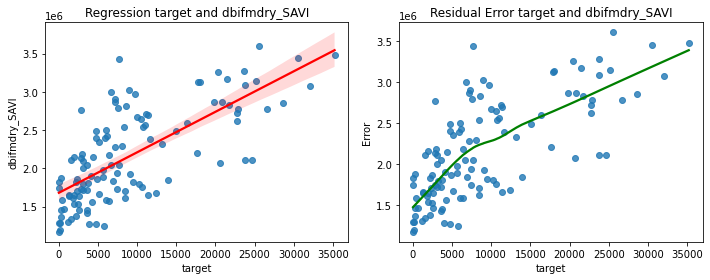

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  115.0909049958985
intersept:  2896623.2746313764
r2:  0.7744313043387517
P_value:  1.2991421634356716e-24
std error:  8.767548853653315


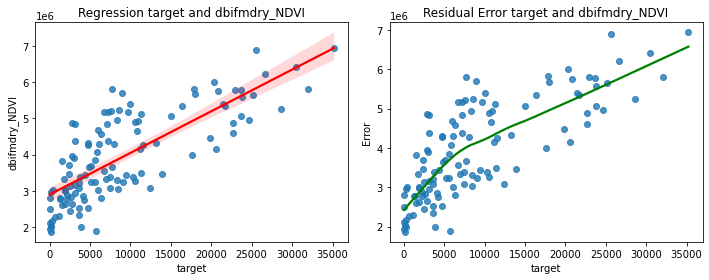

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866


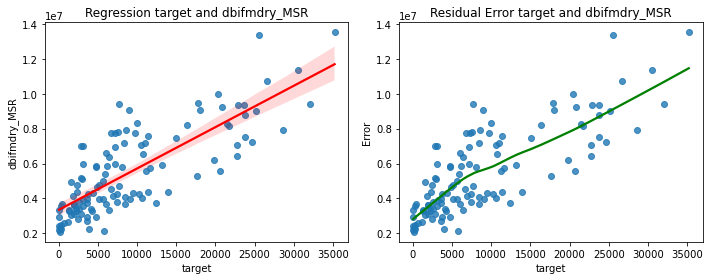

--------------------------------------------------
Residuals
slope:  237.29871183050733
intersept:  3343357.5409054025
r2:  0.7953971312333082
P_value:  9.111449373435028e-27
std error:  16.86159147834866


In [66]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

In [56]:
#df_ml.to_csv(, index=False)
df_ml.to_csv(r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error\gt1000lt40000_3std_no_null.csv".format(drive, date), index=False)

In [57]:
df_ml.describe()

,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rh_tmin_mean,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
count,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,...,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00
mean,9060.81,2.04,7.83,2.10,0.57,3362.18,25.61,102.96,105.59,154.04,...,-1578689.50,1578689.50,1733124.43,-612295.74,1406094.02,1886275.51,1145153.85,2159580.39,3939440.13,5493476.15
std,8316.27,3.21,7.18,3.11,1.16,15.90,18.68,1.28,2.86,9.22,...,430452.53,430452.53,1676421.65,1143536.37,275212.17,573325.20,319460.53,614184.46,1235909.50,2481075.20
min,18.48,0.00,0.00,0.00,0.00,3319.60,1.00,100.72,101.55,124.43,...,-2453826.00,62735.00,-901894.00,-2596291.00,869000.00,1001333.00,636000.00,1169041.00,1868958.00,2081843.00
25%,2833.21,0.00,1.54,0.01,0.00,3350.40,7.75,101.99,103.47,147.84,...,-1903030.00,1293060.00,274190.00,-1508316.00,1202000.00,1425490.00,901000.00,1667542.00,2991914.00,3615602.00
50%,6375.60,0.00,6.49,0.49,0.01,3368.70,24.44,102.82,104.82,154.57,...,-1640212.00,1640212.00,1544347.00,-805076.00,1382000.00,1753382.00,1076000.00,2048817.00,3700573.00,4747514.00
75%,11365.20,3.85,13.82,3.27,0.43,3376.50,41.33,103.89,107.56,160.75,...,-1293060.00,1903030.00,2978541.00,183013.00,1597000.00,2316312.00,1364000.00,2668366.00,4947937.00,7201101.00
max,35199.71,10.25,22.05,10.51,4.49,3376.50,72.56,105.87,112.95,179.98,...,-62735.00,2453826.00,6035524.00,2577320.00,2045000.00,3281569.00,1892000.00,3603833.00,6939020.00,13524145.00


In [58]:
# Check for null values
null_values = df_ml.isnull().sum()

In [59]:
null_values

target               0
fire_mean            0
fire_pois1_2         0
fire_pois1_5         0
fire_pois1_10        0
rh_tmin_mean         0
b1_wfp_dry_mean      0
b1_hsd_mean          0
b1_hmc_mean          0
b1_hcv_mean          0
b1_h99_mean          0
b1_ccw_dry_mean      0
b1_dbifm_dry_mean    0
b1_dp1fm_dry_mean    0
b2_dp1fm_dry_mean    0
b3_dp1fm_dry_mean    0
b2_dbifm_dry_mean    0
b3_dbifm_dry_mean    0
b4_dbifm_dry_mean    0
b5_dbifm_dry_mean    0
b6_dbifm_dry_mean    0
dbifmdry_GSAVI       0
dbifmdry_GNDVI       0
dbifmdry_CVI         0
dbifmdry_NDGI        0
dbifmdry_RI          0
dbifmdry_NBR         0
dbifmdry_NDII        0
dbifmdry_GDVI        0
dbifmdry_MSAVI       0
dbifmdry_DVI         0
dbifmdry_SAVI        0
dbifmdry_NDVI        0
dbifmdry_MSR         0
dtype: int64

In [60]:
df = df_ml

In [62]:
# Function to check if a value is in scientific notation
def is_scientific_notation(value):
    try:
        float_value = float(value)
        return '{:e}'.format(float_value) == value.lower()
    except ValueError:
        return False

# Check for scientific notation in each cell
for column in df.columns:
    for value in df[column]:
        if is_scientific_notation(str(value)):
            print(f"Column {column}: {value} is in scientific notation")

# Model

### Split off unseen data

In [63]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [64]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(65, 33) (65,)
(29, 33) (29,)


### Plot up Histograms for train and test datasets

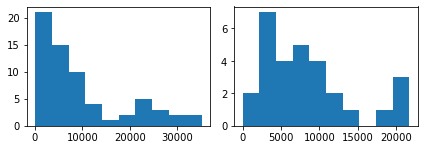

In [65]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [66]:
#print(xdata1)

In [67]:
print(ydata)

[1.8942000e+03 1.1642400e+03 1.5490861e+03 1.9475867e+03 2.5408459e+03
 1.7966666e+03 2.3572266e+03 2.6087600e+03 1.9209960e+03 2.8332131e+03
 2.3895994e+03 2.1469141e+04 3.7422000e+03 1.1180400e+04 2.2699391e+04
 4.8727769e+03 5.5881421e+03 3.1569021e+03 8.0314502e+03 3.1231201e+03
 1.7994760e+04 3.5199711e+04 6.8991998e+02 7.2031958e+03 3.6158325e+03
 6.0447378e+03 5.6064385e+03 3.6687932e+03 8.3762158e+03 2.4670801e+04
 2.8320320e+03 6.0060000e+03 6.3602002e+03 5.1737070e+03 2.4740100e+03
 2.3737561e+04 8.4137900e+03 1.1338128e+04 2.6636295e+04 1.2432934e+04
 7.4328101e+03 7.2401177e+03 2.4024001e+02 2.4024001e+02 1.8480000e+01
 2.9567999e+02 1.2936000e+02 6.6990000e+03 5.5439999e+01 1.1596200e+04
 2.2176001e+03 7.7153999e+03 4.7171880e+03 1.3490400e+03 3.0861599e+03
 7.3919998e+01 3.6036001e+03 6.3756001e+03 2.5585070e+04 2.2881072e+04
 7.1505176e+03 1.0763322e+04 7.4785898e+03 5.7780801e+03 2.0631123e+04
 4.1420864e+03 6.7264146e+03 1.0544602e+04 8.6271875e+03 5.1178052e+03
 4.327

In [68]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=0)



if mdl == "rfr":

    # Define model
    model = rfr()
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [2, 10, 30, 40, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
        'max_depth': [None, 2, 3, 4, 5, 10, 20],
        #'min_samples_split': [2, 3, 4, 5, 10],
        #'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }
elif mdl == "gbr":
    # Define model
    model = gbr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }

elif mdl == "abr":
    # Define model
    model = abr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }
else:
    print("ERROR__"*100)

# Define custom scorer for RMSE
def custom_rmse_scorer(y_true, y_pred):
    rmse = -np.sqrt(mean_squared_error(y_true, y_pred))
    #print("rmse: ", rmse)
    return rmse

# Define custom scorer for MAE
def custom_mae_scorer(y_true, y_pred):
    mae = -mean_absolute_error(y_true, y_pred)
    #print("mae: ", mae)
    return mae

# Define custom scorer for MAE
def custom_r2_scorer(y_true, y_pred):
    # Mean of true target values
    y_mean = np.mean(y_true)

    # Calculate sum of squares of residuals
    ss_residual = np.sum((y_true - y_pred) ** 2)
    #print("ss_residual: ", ss_residual)

    # Calculate sum of squares of total
    ss_total = np.sum((y_true - y_mean) ** 2)
    #print("ss_total: ", ss_total)
    
    # Calculate R^2
    r2 = 1 - (ss_residual / ss_total)
    print("r2: ", r2)


    #r2 = r2_score(y_true, y_pred)
    #print("r2: ", r2)
    return r2

# Make it a scorer
#rmse_scorer = make_scorer(custom_rmse_scorer)
#mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)

# def custom_r2_scorer(y_true, y_pred):

#     r2 = r2_score(y_true, y_pred)
#     print("r2: ", r2)
#     return r2

# Make it a scorer
rmse_scorer = make_scorer(custom_rmse_scorer)
mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)
# -------------------------------------------------------------------

# Create GridSearchCV object with RMSE scoring
grid_search_rmse = GridSearchCV(model, param_grid, scoring=rmse_scorer, cv=5)
grid_search_rmse.fit(X_train, y_train)


print(mdl)
print("-"*100)
# Print the best score and parameters
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)

# Create GridSearchCV object with MAE scoring
grid_search_mae = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5)
grid_search_mae.fit(X_train, y_train)

# Print the best score and parameters
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)

# Create GridSearchCV object with r2 scoring
grid_search_r2 = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search_r2.fit(X_train, y_train)

# Print the best score and parameters
print("r2 Best Score: ", grid_search_r2.best_score_)
print("r2 Best Parameters: ", grid_search_r2.best_params_)

abr
----------------------------------------------------------------------------------------------------
RMSE Best Score:  -5086.3078740994015
RMSE Best Parameters:  {'learning_rate': 1.0, 'n_estimators': 300}
MAE Best Score:  -3629.6672693240025
MAE Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 100}
r2:  0.6440370352892135
r2:  0.515264145198763
r2:  -0.5986764570700085
r2:  0.23996603535634364
r2:  0.6178830967609088
r2:  0.39527075706191783
r2:  0.9170976083347138
r2:  0.36334888344878735
r2:  0.5213927681696577
r2:  0.5650250454223664
r2:  0.4758603799039084
r2:  0.7525392785018382
r2:  0.16502579409259988
r2:  0.6124304080968801
r2:  0.7467174356747228
r2:  0.5114016014205014
r2:  0.8470778700139356
r2:  -0.04392663498547744
r2:  0.5841484277342728
r2:  0.7453217570880092
r2:  0.48892912994601523
r2:  0.8857638532992161
r2:  -0.032946077564245835
r2:  0.5690691239934823
r2:  0.7343999360174203
r2:  0.4883126088307137
r2:  0.926484972878171
r2:  -0.009798169685129032
r2:

In [77]:
# Get best RMSE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_rmse.best_estimator_
fac = "RMSE"

In [72]:
# Get best MAE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_mae.best_estimator_
fac = "MAE"


In [81]:
# Get best R2 parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_r2.best_estimator_
fac = "r2"

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [82]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

main_veg_indicies_fire_mmf_met_rem_r2_abr_Band_Importance_Score.pdf
Fitted model r2 = 0.96
Fitted model mse = 3346808.49
RMSE = 1829.43
n = 65


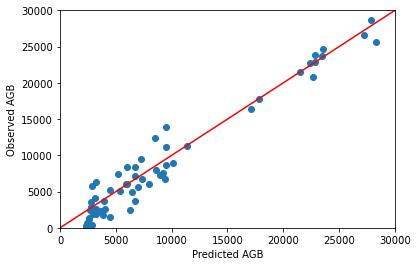

In [83]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
print("{0}_{1}_{2}_{3}_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl))
print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('RMSE =', format(np.sqrt(np.mean((y_1 - rfrLCHM.predict(X_1))**2)), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.1876844889362721
MSE = 27294656.082
RMSE = 5224.429
bias = -850.653
n = 29


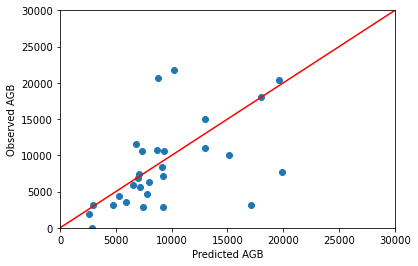

In [84]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2)# ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                 band                      n
21     dbifmdry_GNDVI    0.15475763081418922
15  b2_dbifm_dry_mean    0.15248930034559738
16  b3_dbifm_dry_mean    0.10149082422835869
18  b5_dbifm_dry_mean    0.05995357966336395
14  b3_dp1fm_dry_mean      0.056477157990112
31      dbifmdry_NDVI   0.048684680669936954
11  b1_dbifm_dry_mean    0.04092408614378039
32       dbifmdry_MSR    0.04056195519142222
13  b2_dp1fm_dry_mean    0.03642037313500482
22       dbifmdry_CVI    0.03491634254533311
10    b1_ccw_dry_mean   0.031508837874418834
20     dbifmdry_GSAVI   0.026293925263947162
27      dbifmdry_GDVI   0.023432034164293236
6         b1_hsd_mean   0.022037985977190866
25       dbifmdry_NBR   0.021684935010075665
19  b6_dbifm_dry_mean    0.02019942945526858
9         b1_h99_mean   0.016868843704521814
5     b1_wfp_dry_mean   0.016246740593692802
4        rh_tmin_mean   0.015343267591114918
12  b1_dp1fm_dry_mean    0.01338109384712138
7         b1_hmc_mean    0.01334690191262328
8         

<Figure size 720x432 with 0 Axes>

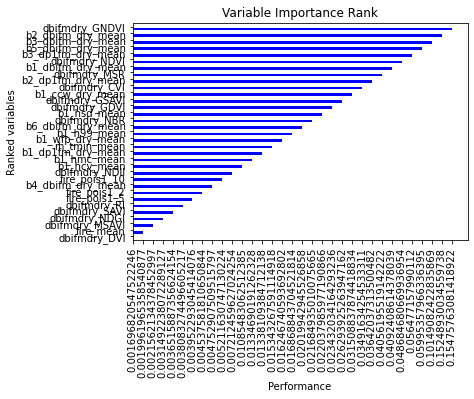

In [85]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [86]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [87]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    33 non-null     object
 1   n       33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [88]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 21 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    33 non-null     object
 1   n       33 non-null     object
dtypes: object(2)
memory usage: 792.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 21 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    33 non-null     object 
 1   n       33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 792.0+ bytes


In [89]:
#Plot has value at the top with very small n value 

In [90]:
#Plot has value at the top with very small n value 
df_var = dfsort.head(20)

In [91]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [92]:
column_var = df_var.band.tolist()

In [93]:
column_var.insert(0, 'target')

In [94]:
column_var

['target',
 'dbifmdry_GNDVI',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b3_dp1fm_dry_mean',
 'dbifmdry_NDVI',
 'b1_dbifm_dry_mean',
 'dbifmdry_MSR',
 'b2_dp1fm_dry_mean',
 'dbifmdry_CVI',
 'b1_ccw_dry_mean',
 'dbifmdry_GSAVI',
 'dbifmdry_GDVI',
 'b1_hsd_mean',
 'dbifmdry_NBR',
 'b6_dbifm_dry_mean',
 'b1_h99_mean',
 'b1_wfp_dry_mean',
 'rh_tmin_mean',
 'b1_dp1fm_dry_mean']

In [95]:
model_data

,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rh_tmin_mean,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
7,1894.20,0.00,0.20,0.00,0.00,3339.70,3.44,100.87,101.66,146.92,...,-1615977.00,1615977.00,2582020.00,-100570.00,1809000.00,1962156.00,1368000.00,2151394.00,3014544.00,3649511.00
9,1164.24,10.00,2.57,0.05,0.00,3363.80,8.33,101.43,102.40,153.55,...,-1876268.00,1876268.00,269231.00,-1603774.00,1068000.00,1105046.00,698000.00,1302239.00,2296053.00,2633573.00
12,1549.09,0.00,0.73,0.00,0.00,3350.30,33.58,103.20,105.79,154.57,...,-1300000.00,1300000.00,1552760.00,-371783.00,1324000.00,1827659.00,1116000.00,2112569.00,3816689.00,4948288.00
17,1947.59,10.25,1.54,0.01,0.00,3372.40,4.53,102.03,103.69,153.91,...,-1786192.00,1786192.00,274190.00,-1358872.00,1345000.00,1442115.00,944000.00,1648428.00,2629526.00,3090187.00
19,2540.85,0.00,0.20,0.00,0.00,3376.50,5.00,101.22,102.20,148.91,...,-1171819.00,1171819.00,-432258.00,-2392921.00,869000.00,1200076.00,706000.00,1458678.00,3123894.00,3815292.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,28623.98,0.00,10.92,1.81,0.13,3376.50,45.78,103.93,106.41,171.03,...,-1605150.00,1605150.00,3436533.00,183013.00,1681000.00,2530075.00,1494000.00,2856232.00,5249473.00,7916638.00
178,20381.03,0.00,22.05,10.51,4.49,3376.50,54.33,104.85,109.99,153.39,...,-1183432.00,1183432.00,4625806.00,1115469.00,1820000.00,2930032.00,1700000.00,3255042.00,5998589.00,9995590.00
179,6094.43,0.00,22.05,10.51,4.49,3376.50,21.67,103.14,105.07,167.08,...,-1828255.00,1828255.00,1729981.00,-902925.00,1556000.00,2123519.00,1292000.00,2422500.00,4306667.00,5852068.00
182,32025.21,7.00,7.95,0.82,0.03,3371.20,59.33,104.22,109.97,145.09,...,-902184.00,902184.00,3841717.00,922882.00,1681000.00,2738959.00,1586000.00,3076028.00,5801024.00,9398624.00


In [96]:
select_df = model_data[column_var]

In [97]:
df_corr = select_df.corr()
df_corr

,target,dbifmdry_GNDVI,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NDVI,b1_dbifm_dry_mean,dbifmdry_MSR,b2_dp1fm_dry_mean,...,b1_ccw_dry_mean,dbifmdry_GSAVI,dbifmdry_GDVI,b1_hsd_mean,dbifmdry_NBR,b6_dbifm_dry_mean,b1_h99_mean,b1_wfp_dry_mean,rh_tmin_mean,b1_dp1fm_dry_mean
target,1.00,0.75,-0.66,-0.68,-0.71,-0.62,0.78,-0.65,0.80,0.75,...,0.72,0.57,0.41,0.67,0.68,-0.71,0.67,0.74,0.33,-0.33
dbifmdry_GNDVI,0.75,1.00,-0.85,-0.83,-0.79,-0.68,0.96,-0.89,0.94,0.90,...,0.88,0.84,0.66,0.82,0.85,-0.87,0.82,0.88,0.32,-0.49
b2_dbifm_dry_mean,-0.66,-0.85,1.00,0.98,0.82,0.59,-0.84,0.97,-0.79,-0.78,...,-0.74,-0.45,-0.18,-0.71,-0.55,0.81,-0.70,-0.73,-0.41,0.43
b3_dbifm_dry_mean,-0.68,-0.83,0.98,1.00,0.86,0.64,-0.88,0.92,-0.84,-0.82,...,-0.79,-0.44,-0.17,-0.72,-0.60,0.85,-0.72,-0.77,-0.37,0.42
b5_dbifm_dry_mean,-0.71,-0.79,0.82,0.86,1.00,0.76,-0.86,0.80,-0.85,-0.84,...,-0.82,-0.50,-0.29,-0.77,-0.77,0.93,-0.76,-0.82,-0.18,0.26
b3_dp1fm_dry_mean,-0.62,-0.68,0.59,0.64,0.76,1.00,-0.74,0.61,-0.73,-0.84,...,-0.81,-0.56,-0.42,-0.72,-0.64,0.65,-0.69,-0.80,-0.18,-0.15
dbifmdry_NDVI,0.78,0.96,-0.84,-0.88,-0.86,-0.74,1.00,-0.85,0.99,0.94,...,0.92,0.78,0.59,0.82,0.88,-0.92,0.83,0.92,0.28,-0.48
b1_dbifm_dry_mean,-0.65,-0.89,0.97,0.92,0.80,0.61,-0.85,1.00,-0.80,-0.79,...,-0.77,-0.56,-0.30,-0.73,-0.60,0.81,-0.72,-0.75,-0.42,0.42
dbifmdry_MSR,0.80,0.94,-0.79,-0.84,-0.85,-0.73,0.99,-0.80,1.00,0.92,...,0.89,0.78,0.60,0.80,0.89,-0.90,0.81,0.91,0.25,-0.45
b2_dp1fm_dry_mean,0.75,0.90,-0.78,-0.82,-0.84,-0.84,0.94,-0.79,0.92,1.00,...,0.95,0.76,0.58,0.83,0.83,-0.86,0.82,0.95,0.28,-0.41


In [98]:
dfsort.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.csv".format(var_, d_type, fac, mdl)))
df_corr.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_select_variable_corrolation.csv".format(var_, d_type, fac, mdl)))

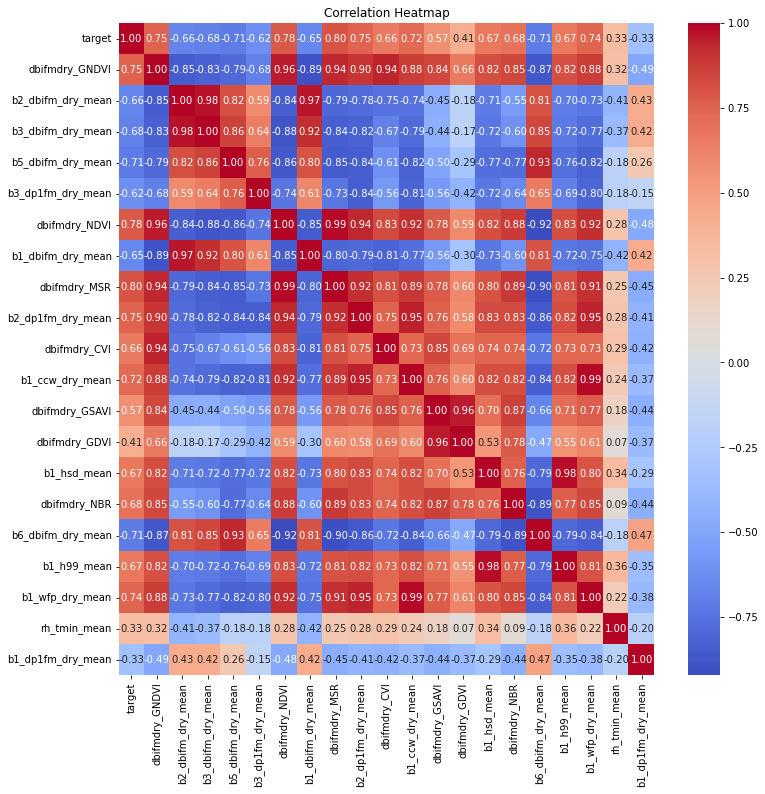

In [99]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [100]:
select_df

,target,dbifmdry_GNDVI,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NDVI,b1_dbifm_dry_mean,dbifmdry_MSR,b2_dp1fm_dry_mean,...,b1_ccw_dry_mean,dbifmdry_GSAVI,dbifmdry_GDVI,b1_hsd_mean,dbifmdry_NBR,b6_dbifm_dry_mean,b1_h99_mean,b1_wfp_dry_mean,rh_tmin_mean,b1_dp1fm_dry_mean
7,1894.20,4415426.00,1144.89,1585.44,3013.67,84.11,3014544.00,616.44,3649511.00,10.67,...,6.89,2982851.00,1809000.00,100.87,2582020.00,1741.67,104.14,3.44,3339.70,3.67
9,1164.24,4000000.00,801.75,1171.92,2583.33,79.50,2296053.00,449.42,2633573.00,3.92,...,1.00,2088657.00,1068000.00,101.43,269231.00,1771.25,105.97,8.33,3363.80,15.42
12,1549.09,4874816.00,696.33,904.00,2176.00,42.42,3816689.00,410.83,4948288.00,36.50,...,53.50,2573872.00,1324000.00,103.20,1552760.00,1477.33,111.97,33.58,3350.30,19.75
17,1947.59,4217623.00,922.62,1323.88,2980.88,67.06,2629526.00,507.38,3090187.00,11.31,...,8.80,2463671.00,1345000.00,102.03,274190.00,2146.44,108.33,4.53,3372.40,20.25
19,2540.85,4144015.00,614.00,777.58,2416.75,81.25,3123894.00,413.00,3815292.00,12.67,...,9.33,1836692.00,869000.00,101.22,-432258.00,1617.00,105.71,5.00,3376.50,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,28623.98,6321926.00,489.67,676.89,2092.89,39.67,5249473.00,259.56,7916638.00,36.33,...,68.44,3292205.00,1681000.00,103.93,3436533.00,1060.56,114.09,45.78,3376.50,22.11
178,20381.03,6705969.00,447.25,567.42,1812.33,46.08,5998589.00,230.33,9995590.00,51.17,...,76.75,3539020.00,1820000.00,104.85,4625806.00,833.83,118.10,54.33,3376.50,1.25
179,6094.43,5687135.00,590.08,854.67,2572.92,46.58,4306667.00,352.58,5852068.00,38.92,...,35.50,3017063.00,1556000.00,103.14,1729981.00,1513.17,111.55,21.67,3376.50,12.83
182,32025.21,6369837.00,479.17,574.17,1795.25,39.83,5801024.00,273.33,9398624.00,52.58,...,81.00,3300825.00,1681000.00,104.22,3841717.00,961.92,117.05,59.33,3371.20,6.08


# Rerun on Selected data

In [101]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(65, 20) (65,)
(29, 20) (29,)


In [102]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

RandomForestRegressor(random_state=RandomState(MT19937) at 0x25487B696A8)

In [103]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [104]:
select_df

,target,dbifmdry_GNDVI,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b5_dbifm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NDVI,b1_dbifm_dry_mean,dbifmdry_MSR,b2_dp1fm_dry_mean,...,b1_ccw_dry_mean,dbifmdry_GSAVI,dbifmdry_GDVI,b1_hsd_mean,dbifmdry_NBR,b6_dbifm_dry_mean,b1_h99_mean,b1_wfp_dry_mean,rh_tmin_mean,b1_dp1fm_dry_mean
7,1894.20,4415426.00,1144.89,1585.44,3013.67,84.11,3014544.00,616.44,3649511.00,10.67,...,6.89,2982851.00,1809000.00,100.87,2582020.00,1741.67,104.14,3.44,3339.70,3.67
9,1164.24,4000000.00,801.75,1171.92,2583.33,79.50,2296053.00,449.42,2633573.00,3.92,...,1.00,2088657.00,1068000.00,101.43,269231.00,1771.25,105.97,8.33,3363.80,15.42
12,1549.09,4874816.00,696.33,904.00,2176.00,42.42,3816689.00,410.83,4948288.00,36.50,...,53.50,2573872.00,1324000.00,103.20,1552760.00,1477.33,111.97,33.58,3350.30,19.75
17,1947.59,4217623.00,922.62,1323.88,2980.88,67.06,2629526.00,507.38,3090187.00,11.31,...,8.80,2463671.00,1345000.00,102.03,274190.00,2146.44,108.33,4.53,3372.40,20.25
19,2540.85,4144015.00,614.00,777.58,2416.75,81.25,3123894.00,413.00,3815292.00,12.67,...,9.33,1836692.00,869000.00,101.22,-432258.00,1617.00,105.71,5.00,3376.50,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,28623.98,6321926.00,489.67,676.89,2092.89,39.67,5249473.00,259.56,7916638.00,36.33,...,68.44,3292205.00,1681000.00,103.93,3436533.00,1060.56,114.09,45.78,3376.50,22.11
178,20381.03,6705969.00,447.25,567.42,1812.33,46.08,5998589.00,230.33,9995590.00,51.17,...,76.75,3539020.00,1820000.00,104.85,4625806.00,833.83,118.10,54.33,3376.50,1.25
179,6094.43,5687135.00,590.08,854.67,2572.92,46.58,4306667.00,352.58,5852068.00,38.92,...,35.50,3017063.00,1556000.00,103.14,1729981.00,1513.17,111.55,21.67,3376.50,12.83
182,32025.21,6369837.00,479.17,574.17,1795.25,39.83,5801024.00,273.33,9398624.00,52.58,...,81.00,3300825.00,1681000.00,104.22,3841717.00,961.92,117.05,59.33,3371.20,6.08


## Re-train model on selected paramiters

Fitted model r2 = 0.95
Fitted model mse = 3731638.79
RMSE = 1931.745
n = 65


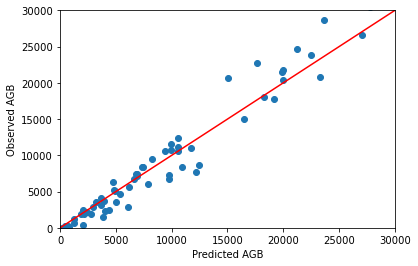

In [105]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('RMSE =', format(np.sqrt(np.mean((y_1 - rfrLCHM.predict(X_1))**2)), '.3f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1,30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                 band                     n
15  b6_dbifm_dry_mean   0.17285956544069342
2   b3_dbifm_dry_mean   0.15638659686783593
1   b2_dbifm_dry_mean   0.10366209175439899
0      dbifmdry_GNDVI   0.08979230556087794
7        dbifmdry_MSR    0.0875670861443667
8   b2_dp1fm_dry_mean  0.056470844797327946
4   b3_dp1fm_dry_mean   0.04458462694492326
14       dbifmdry_NBR   0.04068878960851865
3   b5_dbifm_dry_mean   0.03798768501050632
5       dbifmdry_NDVI   0.03505383658165381
13        b1_hsd_mean  0.029346543242141688
16        b1_h99_mean  0.027474584887990892
6   b1_dbifm_dry_mean  0.020670627833689094
18       rh_tmin_mean  0.019500287038170777
9        dbifmdry_CVI  0.018744426498988956
10    b1_ccw_dry_mean  0.018120930948689513
19  b1_dp1fm_dry_mean  0.014198766793549322
17    b1_wfp_dry_mean  0.011989730596065942
12      dbifmdry_GDVI  0.009426326128424362
11     dbifmdry_GSAVI  0.005474347321186481


<Figure size 720x432 with 0 Axes>

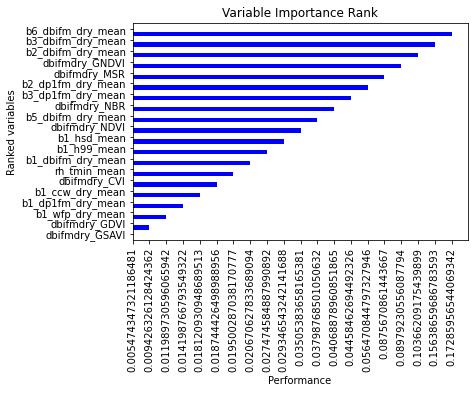

In [106]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_select_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.3519452205863227
MSE = 27814389.625
RMSE = 5273.935
bias = -2934.254
n = 29


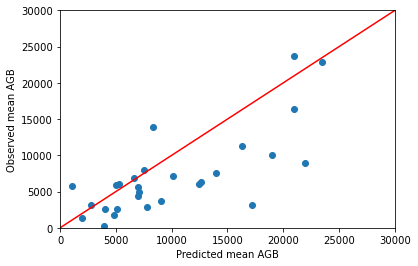

In [107]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [108]:
variable_imp_list = dfsort.band.to_list()

In [109]:
variable_imp_list

['b6_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b2_dbifm_dry_mean',
 'dbifmdry_GNDVI',
 'dbifmdry_MSR',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'dbifmdry_NBR',
 'b5_dbifm_dry_mean',
 'dbifmdry_NDVI',
 'b1_hsd_mean',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'rh_tmin_mean',
 'dbifmdry_CVI',
 'b1_ccw_dry_mean',
 'b1_dp1fm_dry_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_GSAVI']

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [109]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [110]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rh_tmin_mean,b1_wfp_dry_mean,b1_hsd_mean,b1_hmc_mean,b1_hcv_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
179,6094.43,0.00,22.05,10.51,4.49,3376.50,21.67,103.14,105.07,167.08,...,-1828255.00,1828255.00,1729981.00,-902925.00,1556000.00,2123519.00,1292000.00,2422500.00,4306667.00,5852068.00
176,28623.98,0.00,10.92,1.81,0.13,3376.50,45.78,103.93,106.41,171.03,...,-1605150.00,1605150.00,3436533.00,183013.00,1681000.00,2530075.00,1494000.00,2856232.00,5249473.00,7916638.00
21,2357.23,0.00,0.20,0.00,0.00,3367.40,15.75,102.23,103.70,155.95,...,-1247357.00,1247357.00,249688.00,-1679757.00,1021000.00,1423172.00,844000.00,1701613.00,3459016.00,4344491.00
169,13908.65,8.00,17.79,6.15,1.53,3376.50,33.58,103.84,107.12,159.10,...,-1782438.00,1782438.00,1204600.00,-589731.00,1224000.00,1569315.00,952000.00,1842581.00,3461818.00,4349057.00
47,2215.29,7.75,1.54,0.01,0.00,3372.10,2.33,101.16,102.01,155.80,...,-1539457.00,1539457.00,-557554.00,-2519592.00,921000.00,1137112.00,683000.00,1372037.00,2768545.00,3287946.00
83,7240.12,0.00,9.43,1.26,0.06,3348.80,52.75,103.76,107.72,154.79,...,-1643725.00,1643725.00,2981651.00,68935.00,1748000.00,2587923.00,1545000.00,2903044.00,5179350.00,7744909.00
51,3615.83,0.00,10.92,1.81,0.13,3370.50,5.42,101.71,102.55,157.69,...,-2121573.00,2121573.00,-69641.00,-2084704.00,1264000.00,1466463.00,908000.00,1714933.00,3086336.00,3757987.00
149,8627.19,8.00,22.05,10.51,4.49,3376.50,31.67,105.35,109.74,152.35,...,-1131601.00,1131601.00,3799806.00,856269.00,1601000.00,2491369.00,1466000.00,2821401.00,5246958.00,7910420.00
43,17994.76,7.00,20.09,8.32,2.81,3346.90,37.56,103.34,106.15,149.20,...,-1446886.00,1446886.00,3763636.00,530953.00,1804000.00,2804744.00,1646000.00,3126900.00,5683702.00,9062004.00
36,4872.78,0.00,12.38,2.48,0.25,3372.30,12.50,102.53,104.43,161.59,...,-1935953.00,1935953.00,579058.00,-1474855.00,1209000.00,1578584.00,943000.00,1865357.00,3650794.00,4662878.00


In [111]:
c_list = unseen_data.columns.tolist()
c_list

['target',
 'fire_mean',
 'fire_pois1_2',
 'fire_pois1_5',
 'fire_pois1_10',
 'rh_tmin_mean',
 'b1_wfp_dry_mean',
 'b1_hsd_mean',
 'b1_hmc_mean',
 'b1_hcv_mean',
 'b1_h99_mean',
 'b1_ccw_dry_mean',
 'b1_dbifm_dry_mean',
 'b1_dp1fm_dry_mean',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']

In [112]:
df = unseen_data[column_var]

In [113]:
df

,target,b1_h99_mean,b1_hsd_mean,dbifmdry_GNDVI,b5_dbifm_dry_mean,dbifmdry_MSR,dbifmdry_CVI,b1_hmc_mean,dbifmdry_NDVI,dbifmdry_GDVI,...,fire_pois1_2,b2_dbifm_dry_mean,b2_dp1fm_dry_mean,b1_wfp_dry_mean,rh_tmin_mean,b4_dbifm_dry_mean,fire_pois1_5,b1_dp1fm_dry_mean,b1_dbifm_dry_mean,b3_dbifm_dry_mean
179,6094.43,111.55,103.14,5687135.00,2572.92,5852068.00,52648205.00,105.07,4306667.00,1556000.00,...,22.05,590.08,38.92,21.67,3376.50,2146.42,10.51,12.83,352.58,854.67
176,28623.98,114.09,103.93,6321926.00,2092.89,7916638.00,61346348.00,106.41,5249473.00,1681000.00,...,10.92,489.67,36.33,45.78,3376.50,2170.56,1.81,22.11,259.56,676.89
21,2357.23,109.24,102.23,4511710.00,2305.33,4344491.00,33977611.00,103.70,3459016.00,1021000.00,...,0.20,621.00,23.25,15.75,3367.40,1642.83,0.00,6.17,385.92,798.50
169,13908.65,115.09,103.84,4939467.00,2083.42,4349057.00,42328320.00,107.12,3461818.00,1224000.00,...,17.79,627.92,27.58,33.58,3376.50,1851.08,6.15,20.33,409.58,899.42
47,2215.29,105.36,101.16,4131898.00,2636.78,3287946.00,32846562.00,102.01,2768545.00,921000.00,...,1.54,654.56,8.89,2.33,3372.10,1575.67,0.01,5.89,377.78,892.00
83,7240.12,114.73,103.76,6287770.00,2233.55,7744909.00,61137251.00,107.72,5179350.00,1748000.00,...,9.43,516.91,50.00,52.75,3348.80,2264.73,1.26,2.25,271.91,719.18
51,3615.83,106.45,101.71,4887858.00,2939.33,3757987.00,44807299.00,102.55,3086336.00,1264000.00,...,10.92,661.58,13.00,5.42,3370.50,1925.25,1.81,4.00,408.75,1017.33
149,8627.19,119.21,105.35,6021061.00,1794.75,7910420.00,50540128.00,109.74,5246958.00,1601000.00,...,22.05,529.75,43.92,31.67,3376.50,2130.00,10.51,5.83,299.58,664.17
43,17994.76,111.59,103.34,6588751.00,2042.56,9062004.00,65082375.00,106.15,5683702.00,1804000.00,...,20.09,467.22,48.33,37.56,3346.90,2271.22,8.32,1.11,247.89,625.56
36,4872.78,109.76,102.53,5217954.00,2373.50,4662878.00,47102790.00,104.43,3650794.00,1209000.00,...,12.38,554.92,20.33,12.50,3372.30,1763.50,2.48,5.58,350.17,820.92


In [114]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

(23, 21)


In [115]:
# dfx = df1[:1]
# dfy = df1[1:]

In [116]:
df1.columns

Index(['target', 'b1_h99_mean', 'b1_hsd_mean', 'dbifmdry_GNDVI',
       'b5_dbifm_dry_mean', 'dbifmdry_MSR', 'dbifmdry_CVI', 'b1_hmc_mean',
       'dbifmdry_NDVI', 'dbifmdry_GDVI', 'b1_ccw_dry_mean', 'fire_pois1_2',
       'b2_dbifm_dry_mean', 'b2_dp1fm_dry_mean', 'b1_wfp_dry_mean',
       'rh_tmin_mean', 'b4_dbifm_dry_mean', 'fire_pois1_5',
       'b1_dp1fm_dry_mean', 'b1_dbifm_dry_mean', 'b3_dbifm_dry_mean'],
      dtype='object')

In [117]:
column_var

['target',
 'b1_h99_mean',
 'b1_hsd_mean',
 'dbifmdry_GNDVI',
 'b5_dbifm_dry_mean',
 'dbifmdry_MSR',
 'dbifmdry_CVI',
 'b1_hmc_mean',
 'dbifmdry_NDVI',
 'dbifmdry_GDVI',
 'b1_ccw_dry_mean',
 'fire_pois1_2',
 'b2_dbifm_dry_mean',
 'b2_dp1fm_dry_mean',
 'b1_wfp_dry_mean',
 'rh_tmin_mean',
 'b4_dbifm_dry_mean',
 'fire_pois1_5',
 'b1_dp1fm_dry_mean',
 'b1_dbifm_dry_mean',
 'b3_dbifm_dry_mean']

In [118]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 179 to 104
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             23 non-null     float64
 1   b1_h99_mean        23 non-null     float64
 2   b1_hsd_mean        23 non-null     float64
 3   dbifmdry_GNDVI     23 non-null     float64
 4   b5_dbifm_dry_mean  23 non-null     float64
 5   dbifmdry_MSR       23 non-null     float64
 6   dbifmdry_CVI       23 non-null     float64
 7   b1_hmc_mean        23 non-null     float64
 8   dbifmdry_NDVI      23 non-null     float64
 9   dbifmdry_GDVI      23 non-null     float64
 10  b1_ccw_dry_mean    23 non-null     float64
 11  fire_pois1_2       23 non-null     float64
 12  b2_dbifm_dry_mean  23 non-null     float64
 13  b2_dp1fm_dry_mean  23 non-null     float64
 14  b1_wfp_dry_mean    23 non-null     float64
 15  rh_tmin_mean       23 non-null     float64
 16  b4_dbifm_dry_mean  23 non

In [119]:
df1

,target,b1_h99_mean,b1_hsd_mean,dbifmdry_GNDVI,b5_dbifm_dry_mean,dbifmdry_MSR,dbifmdry_CVI,b1_hmc_mean,dbifmdry_NDVI,dbifmdry_GDVI,...,fire_pois1_2,b2_dbifm_dry_mean,b2_dp1fm_dry_mean,b1_wfp_dry_mean,rh_tmin_mean,b4_dbifm_dry_mean,fire_pois1_5,b1_dp1fm_dry_mean,b1_dbifm_dry_mean,b3_dbifm_dry_mean
179,6094.43,111.55,103.14,5687135.00,2572.92,5852068.00,52648205.00,105.07,4306667.00,1556000.00,...,22.05,590.08,38.92,21.67,3376.50,2146.42,10.51,12.83,352.58,854.67
176,28623.98,114.09,103.93,6321926.00,2092.89,7916638.00,61346348.00,106.41,5249473.00,1681000.00,...,10.92,489.67,36.33,45.78,3376.50,2170.56,1.81,22.11,259.56,676.89
21,2357.23,109.24,102.23,4511710.00,2305.33,4344491.00,33977611.00,103.70,3459016.00,1021000.00,...,0.20,621.00,23.25,15.75,3367.40,1642.83,0.00,6.17,385.92,798.50
169,13908.65,115.09,103.84,4939467.00,2083.42,4349057.00,42328320.00,107.12,3461818.00,1224000.00,...,17.79,627.92,27.58,33.58,3376.50,1851.08,6.15,20.33,409.58,899.42
47,2215.29,105.36,101.16,4131898.00,2636.78,3287946.00,32846562.00,102.01,2768545.00,921000.00,...,1.54,654.56,8.89,2.33,3372.10,1575.67,0.01,5.89,377.78,892.00
83,7240.12,114.73,103.76,6287770.00,2233.55,7744909.00,61137251.00,107.72,5179350.00,1748000.00,...,9.43,516.91,50.00,52.75,3348.80,2264.73,1.26,2.25,271.91,719.18
51,3615.83,106.45,101.71,4887858.00,2939.33,3757987.00,44807299.00,102.55,3086336.00,1264000.00,...,10.92,661.58,13.00,5.42,3370.50,1925.25,1.81,4.00,408.75,1017.33
149,8627.19,119.21,105.35,6021061.00,1794.75,7910420.00,50540128.00,109.74,5246958.00,1601000.00,...,22.05,529.75,43.92,31.67,3376.50,2130.00,10.51,5.83,299.58,664.17
43,17994.76,111.59,103.34,6588751.00,2042.56,9062004.00,65082375.00,106.15,5683702.00,1804000.00,...,20.09,467.22,48.33,37.56,3346.90,2271.22,8.32,1.11,247.89,625.56
36,4872.78,109.76,102.53,5217954.00,2373.50,4662878.00,47102790.00,104.43,3650794.00,1209000.00,...,12.38,554.92,20.33,12.50,3372.30,1763.50,2.48,5.58,350.17,820.92


In [120]:
list(df1.columns)

['target',
 'b1_h99_mean',
 'b1_hsd_mean',
 'dbifmdry_GNDVI',
 'b5_dbifm_dry_mean',
 'dbifmdry_MSR',
 'dbifmdry_CVI',
 'b1_hmc_mean',
 'dbifmdry_NDVI',
 'dbifmdry_GDVI',
 'b1_ccw_dry_mean',
 'fire_pois1_2',
 'b2_dbifm_dry_mean',
 'b2_dp1fm_dry_mean',
 'b1_wfp_dry_mean',
 'rh_tmin_mean',
 'b4_dbifm_dry_mean',
 'fire_pois1_5',
 'b1_dp1fm_dry_mean',
 'b1_dbifm_dry_mean',
 'b3_dbifm_dry_mean']

In [121]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [122]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [123]:
xdata1.shape

(94, 20)

In [124]:
ydata.shape

(23, 1)

Predicted data r2 = 0.5787345916420376
MSE = 112442385.920
RMSE = 10603.885
explained_var = 0.592
bias = 1036.662
n = 23


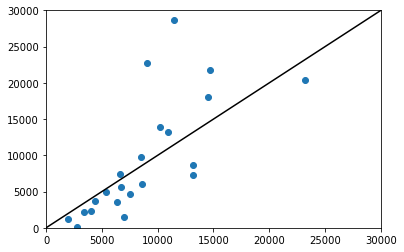

In [125]:
with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata) #,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1, 30000)
plt.ylim(-1, 30000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open("{0}_{1}_{2}_{3}_sel_data".format(var_, d_type, fac, mdl)', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()